### Pokemon data exploration

In this file we look at whether there are any correlations visible that may be useful for a machine learning model that tries to predict one of the stats.

This seems reasonable for a number of parameters. The most straightforward one is that being a Legendary would indicate higher overall stats. Additionally, one would expect that Fighting types often have more physical Attack, while Psychic often have more Special Attack, so the typing could also be a good indicator. Next, there might be a change in overall stats per Generation. Finally, Pokemon often have a certain role that is determined by their stats. There are for instance defensive Pokemon, which have high Defense, Special Defense and HP, while having low Attack, Special Attack and Speed. So we would expect that other stats could also help to determine any one given stat. On top of this, as Pokemon evolve, all their stats will generally increase, so it is unlikely to have Pokemon with one very high stat while another is very low. We search for useful relations in this file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../../data/poke_data/Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


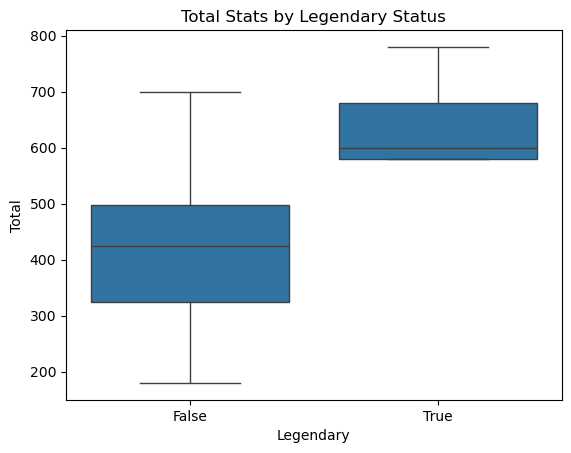

In [3]:
# First let's confirm that stats are just higher for Legendary Pokémon, using the total stat sum
sns.boxplot(x='Legendary', y='Total', data=data)
plt.title('Total Stats by Legendary Status')
plt.show()

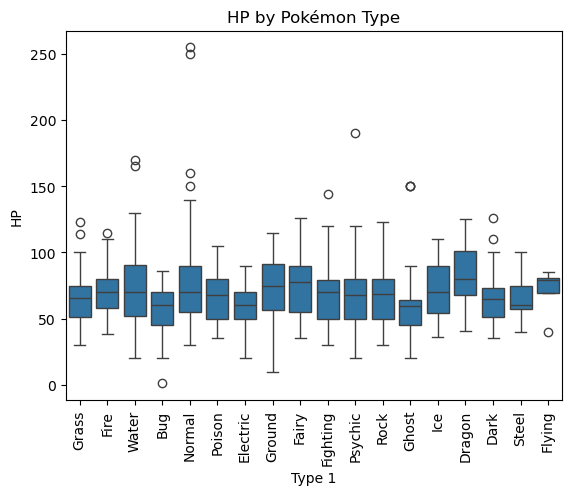

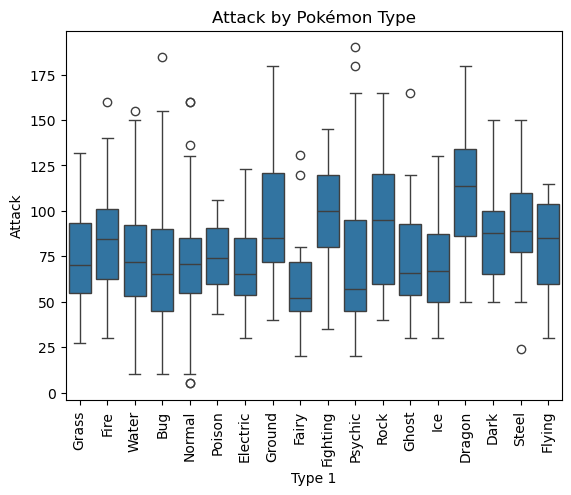

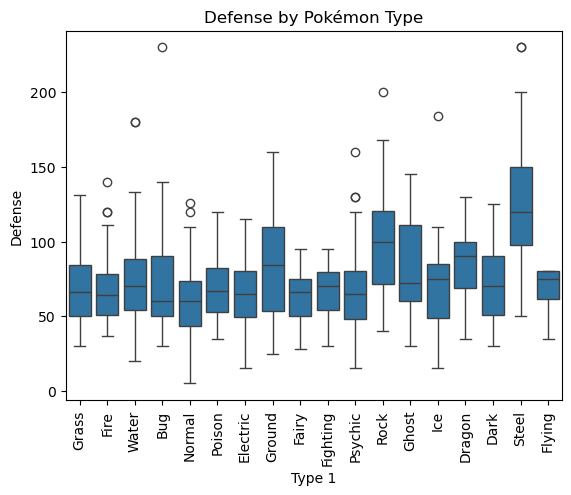

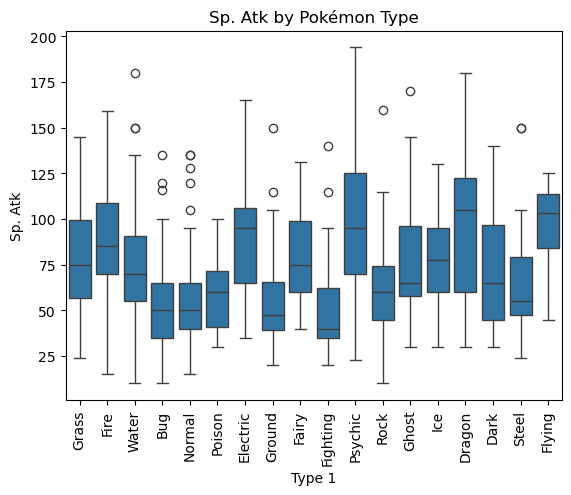

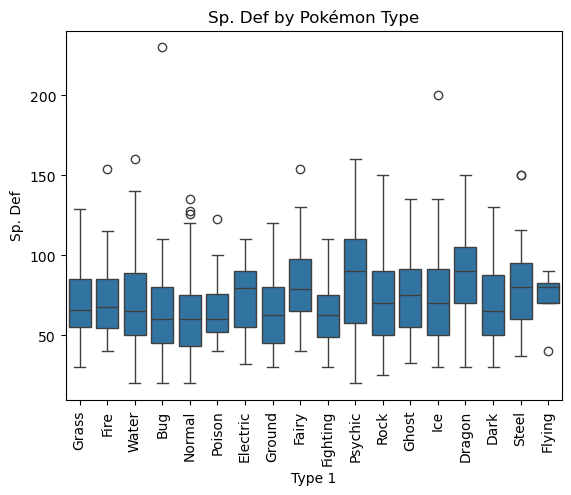

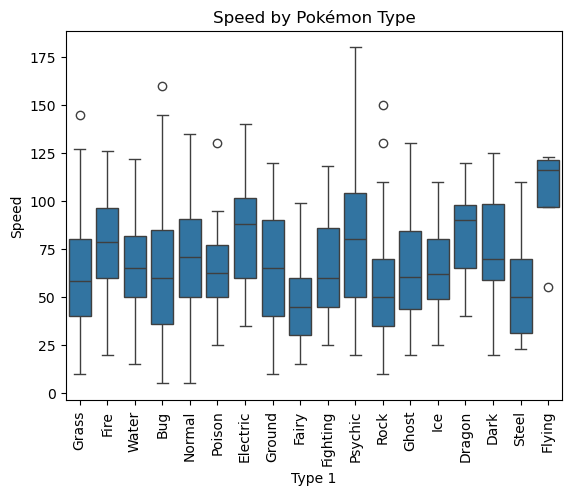

In [4]:
# Next look at each stat for each type
stat_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stat_list:
    sns.boxplot(x='Type 1', y=stat, data=data)
    plt.title(f'{stat} by Pokémon Type')
    plt.xticks(rotation=90)
    plt.show()
# Although some types overlap a lot in certain stats, there are some clear differences in others, so this should be useful for our model

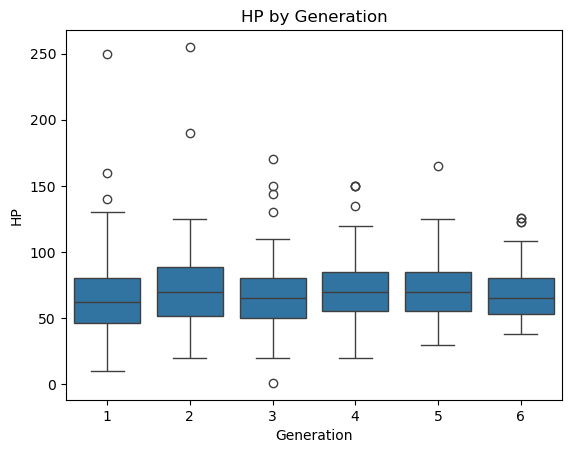

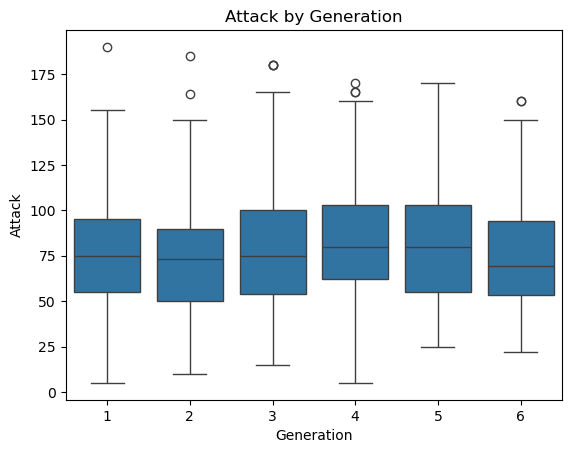

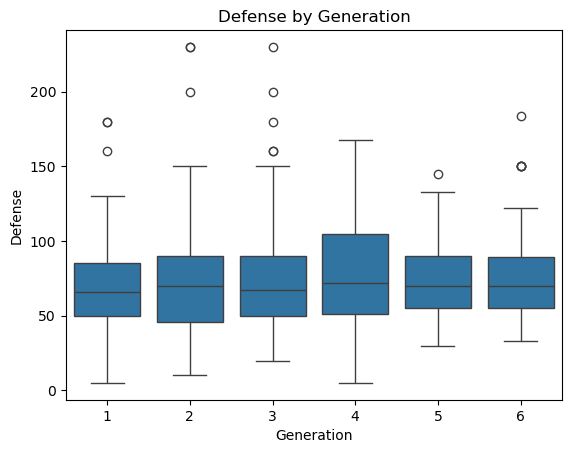

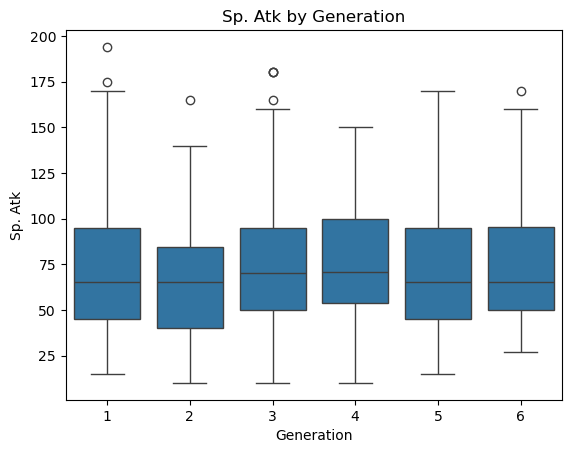

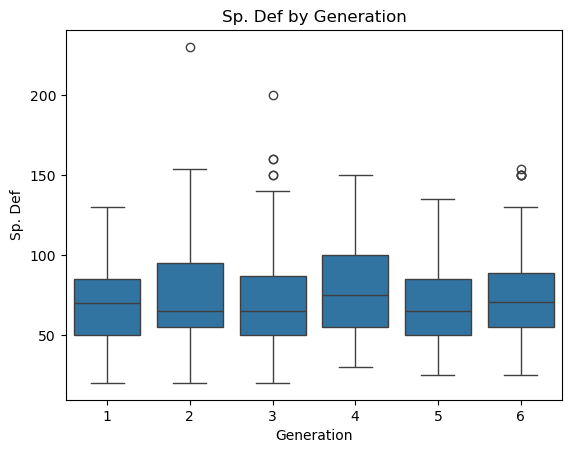

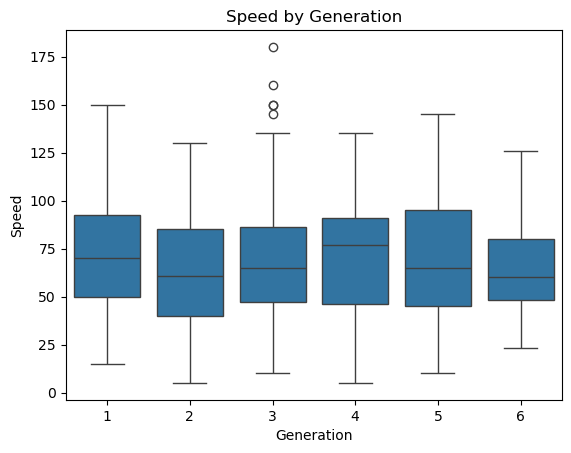

In [ ]:
# Next do the same but for each Gen
for stat in stat_list:
    sns.boxplot(x='Generation', y=stat, data=data)
    plt.title(f'{stat} by Generation')
    plt.show()
# Here there does not seem to be any relation, so we will not use Generation in our model

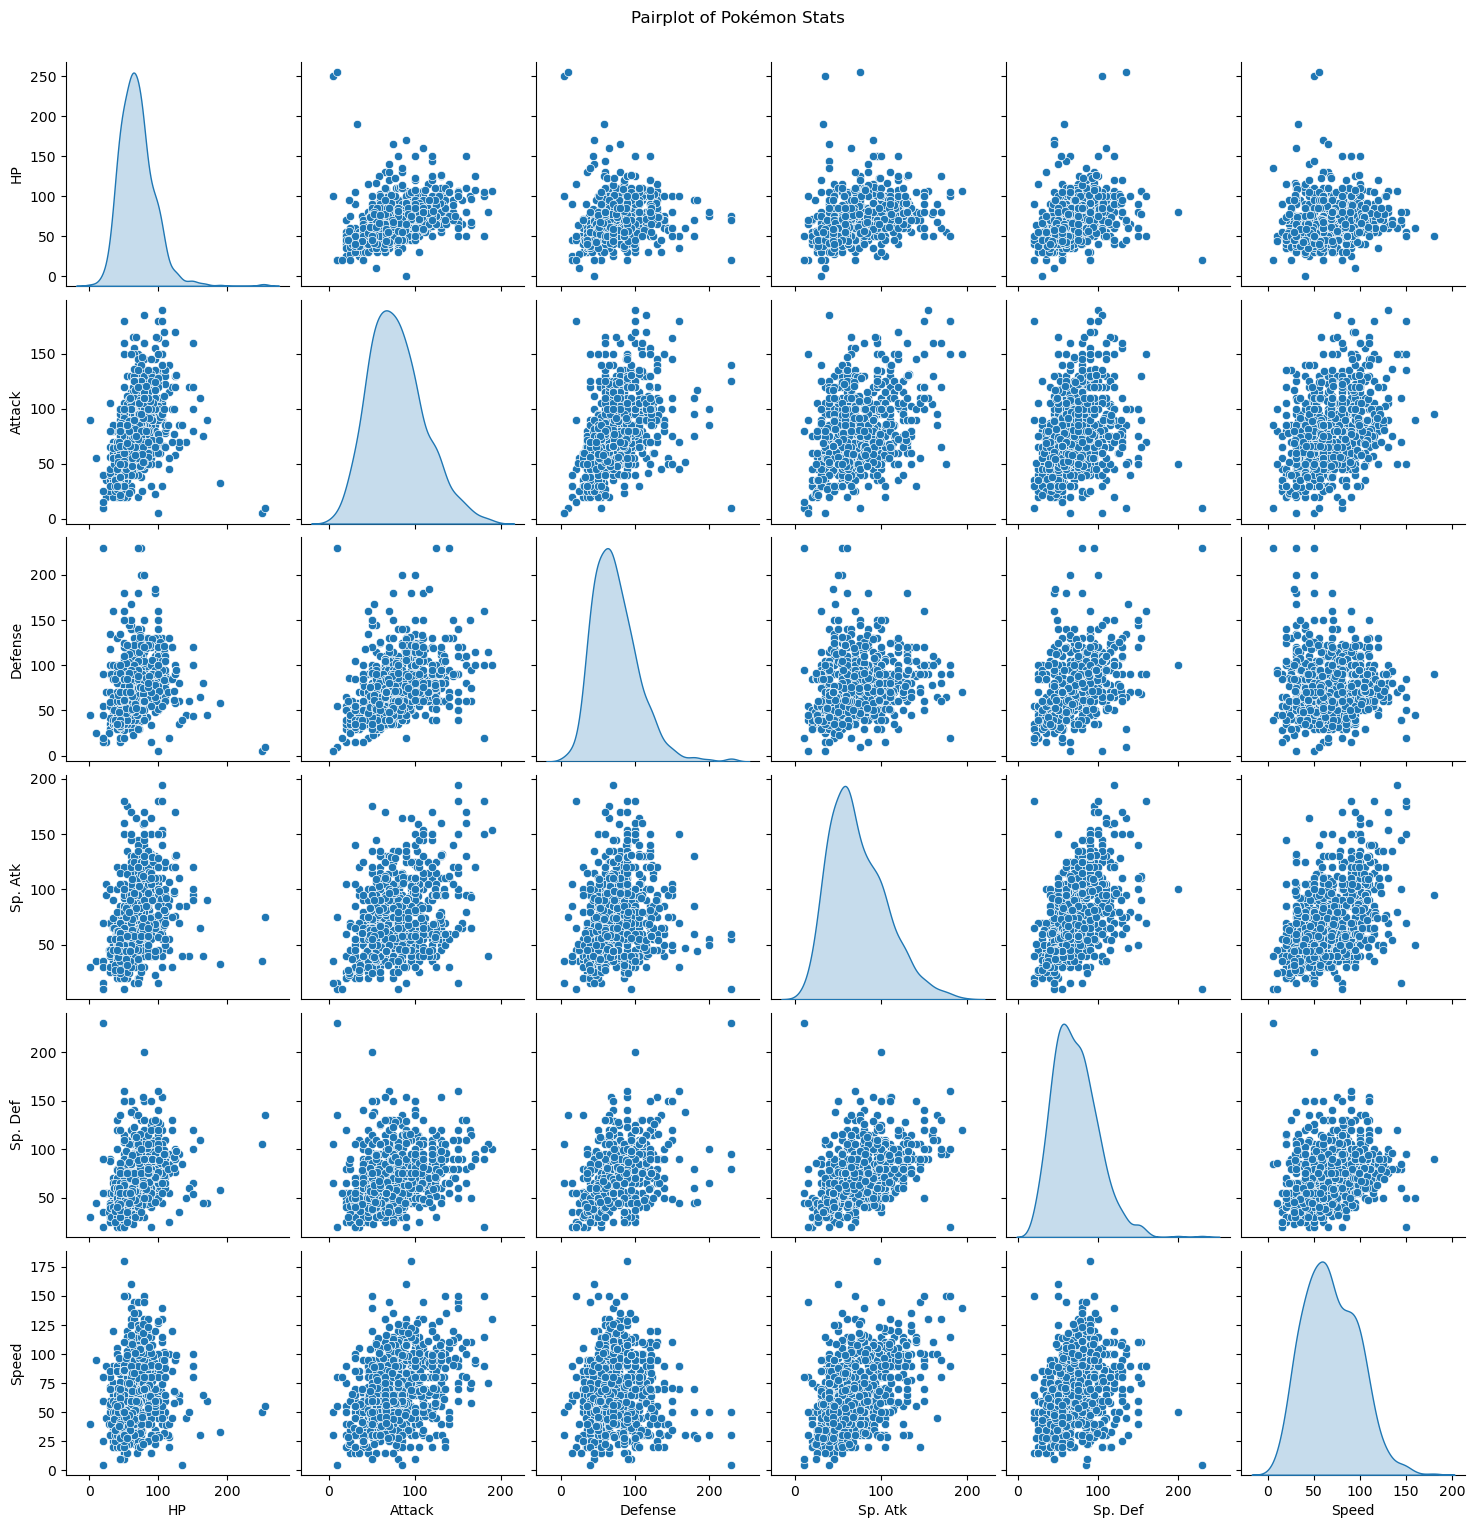

In [5]:
# Finally check if we can see any relations between different stats, like Attack vs. Defense
sns.pairplot(data, vars=stat_list, diag_kind='kde')
plt.suptitle('Pairplot of Pokémon Stats', y=1.02)
plt.show()

So there are no strict relations visible, as we mostly see big blobs. The blobs aren't entirely round though, and in some cases like Attack vs Defense or Attack vs Special Attack you can see a somewhat linear trend.